# Part 1: Binning degree distributions


## Binning real numbers


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

**Let's do a gentle start and use the `random` library to generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.**

In [2]:
X = [random.gauss(2, 0.125) for _ in range(5000)]
round(np.mean(X), 3), round(np.std(X), 3)

(1.999, 0.126)

**Now, let's use `numpy.histogram` to bin those number into 10 bins.**

In [3]:
hist, bin_edges = np.histogram(X, bins=10)
hist, bin_edges

(array([   6,   36,  175,  617, 1159, 1414, 1031,  421,  119,   22]),
 array([1.50882409, 1.60053055, 1.69223702, 1.78394348, 1.87564994,
        1.9673564 , 2.05906287, 2.15076933, 2.24247579, 2.33418225,
        2.42588872]))

In [4]:
len(hist), len(bin_edges)

(10, 11)

**What does the `numpy.histogram` function return?**    
`numpy.histogram` returns two arrays: first represents the count of elements in each bin, while the second array represents the edges of each bin. 

**Do the two arrays have the same length?**  
Because there are 10 bins and each has to be constrained from two sides, hence we end up with 11 edges. Two arrays do not have the same length.


**Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths.**  

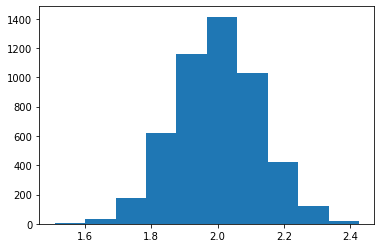

In [5]:
bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
plt.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])
plt.show()

**Explain how you deal with this problem and why.**  
The 'problem' of different lengths of these arrays is solved by creating a list of means of each consecutive pair of bin edges and setting the width of each plotted bar.

It gives a correct result, because histogram works by grouping the samples to bins, each of the same width. The 'plt.bar' function draws each bar (histograms bin) centered at the middle of the bins edges.

The width of a bar/bin is equal for each bar/bin and be computed as an absolute difference of any of two neighbouring bin edges.

## Binning integers 

**binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators.** 

**Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$.**

In [6]:
lam = 10
N = 5000
poisson_sample = np.random.poisson(lam=lam, size=N)

**Find the maximum and minimum value of your 5000 random numbers.**

In [7]:
max_value = np.max(poisson_sample)
min_value = np.min(poisson_sample)

max_value, min_value

(22, 1)

**Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$.**

In [8]:
v = np.arange(min_value, max_value+1)
v

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [9]:
hist_poiss, bin_edges_poiss = np.histogram(poisson_sample, bins=v)
hist_poiss

array([  1,  13,  35,  84, 193, 321, 456, 614, 649, 630, 561, 443, 366,
       239, 161,  96,  59,  44,  23,   6,   6])

*It can be shown that the value of each bin is trully the count of this number in Poisson sample by using the `collections.Counter` class and comparing its output to  `hist_poiss` variable value.*

In [11]:
from collections import Counter
counter = Counter(poisson_sample)
str(sorted([(k, v) for k, v in counter.items()], key=lambda _tuple: _tuple[0]))

'[(1, 1), (2, 13), (3, 35), (4, 84), (5, 193), (6, 321), (7, 456), (8, 614), (9, 649), (10, 630), (11, 561), (12, 443), (13, 366), (14, 239), (15, 161), (16, 96), (17, 59), (18, 44), (19, 23), (20, 6), (21, 4), (22, 2)]'

**Is it correct to set the first entry of  𝑣  to be equal to the smallest value you observe and the last entry of  𝑣  to be the highest value observed?**  

Yes, it is correct because  "All but the last (righthand-most) bin is half-open." as the the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) states.

**Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution**

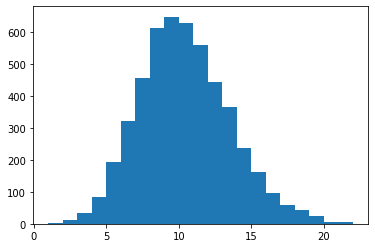

In [12]:
bin_means_poiss = [0.5 * (bin_edges_poiss[i] + bin_edges_poiss[i+1]) for i in range(len(bin_edges_poiss)-1)]
plt.bar(bin_means_poiss, hist_poiss, width=bin_edges_poiss[1] - bin_edges_poiss[0])
plt.show()

## Binning and plotting degree distributions

  **Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$?**  
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.


In [16]:
avg_k = lam
p = avg_k / (N - 1)

*As it is given in the hint, we have: $$p = \frac{\langle k \rangle}{N-1}$$*  
*The formula for the average node degree follows from two facts: each connection is sampled with probability $p$ and each node can connect to all other nodes, but not itself, hence $N-1$*


**Now, use `networkx` to create the graph and extract the degree distribution.**

In [25]:
G = nx.erdos_renyi_graph(n=N, p=p)
degrees = [v for k, v in dict(G.degree).items()]
f"Average degree is {np.mean(degrees)}, which is close to {lam}."

'Average degree is 10.054, which is close to 10.'

  **Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

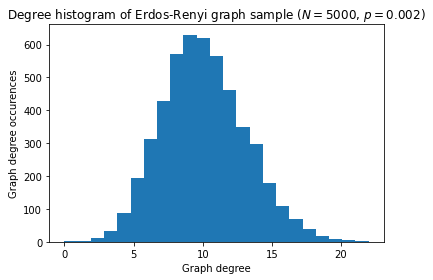

In [31]:
hist, bin_edges = np.histogram(degrees, bins=len(set(degrees)))

bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
plt.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])
plt.title(f"Degree histogram of Erdos-Renyi graph sample ($N={N}$, $p={round(p,3)}$)")
plt.xlabel("Graph degree")
plt.ylabel("Graph degree occurences")
plt.show()